# In this notebook we demonstrate the computational difficulty of continuous MAMP brought by tunnel environment 

In [13]:
import sys
sys.path.append('../../')
from panav.env import NavigationEnv, Box2DRegion, box_2d_center
from panav.hybrid import HybridGraph
from panav.viz import draw_env,draw_hybrid

import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
from time import time

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def flowtime(plan):
    return np.sum([t[-1] for t,x in plan])

## Obstacle-free environment

In [32]:
start_box_side = np.array([1,1])
goal_box_side = np.array([1,1])

top, bottom = 6,-6
start_x_offset = 7
goal_x_offset = 9
N = 3
bloating_r = 0.5

start_locs = np.vstack([
np.vstack([np.ones(N)*start_x_offset,np.linspace(top,bottom, N)]).T,
np.vstack([np.ones(N)*(-start_x_offset),np.linspace(top,bottom, N)]).T])

goal_locs = np.vstack([
np.vstack([np.ones(N)*(-goal_x_offset),np.linspace(bottom,top, N)]).T,
np.vstack([np.ones(N)*goal_x_offset,np.linspace(bottom,top, N)]).T])


starts = [box_2d_center(s,start_box_side) for s in start_locs]
goals = [box_2d_center(g,goal_box_side) for g in goal_locs]
limits = [(-10.0,10.0),(-10.0,10.0)]

env = NavigationEnv(limits,[],starts,goals)

HG =  HybridGraph(env,bloating_r,K = 4)

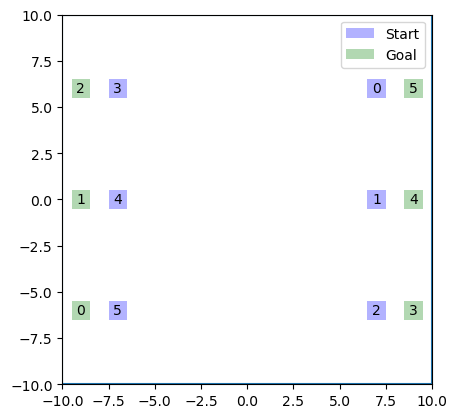

In [30]:
ax = plt.gca()
draw_env(env,show_agent_ID=True)
plt.show()    

In [34]:
from panav.SAMP import Tube_Planning
from panav.util import unique_tx
agents = set(np.arange(len(env.starts)))

plan = []
times = []
t0 = time()
success = True
fail_time = None
for agent in agents:
    print(agent)
    
    start = env.starts[agent]
    goal = env.goals[agent]

    agent_success = False
    
    for K in [7]:
        # print("K",K)
        results = Tube_Planning(env,start,goal,HG.vmax,bloating_r,\
                                    plan,\
                                    HG.d,K,ignore_finished_agents=False)
        if results is not None:
            t,xs = results
            times.append(time()-t0)
            # print(times)
            t,xs = unique_tx(t,xs)
            plan.append((t,xs))
            agent_success = True
            break
        

    if not agent_success:
        print("Solution failed.")
        success = False
        times.append(time()-t0)
        break



0
K 7
[0.010902881622314453]
1
K 7
[0.010902881622314453, 0.05250096321105957]
2
K 7
[0.010902881622314453, 0.05250096321105957, 0.3619499206542969]
3
K 7
[0.010902881622314453, 0.05250096321105957, 0.3619499206542969, 0.513096809387207]
4
K 7
[0.010902881622314453, 0.05250096321105957, 0.3619499206542969, 0.513096809387207, 1.7887678146362305]
5
K 7
[0.010902881622314453, 0.05250096321105957, 0.3619499206542969, 0.513096809387207, 1.7887678146362305, 6.077399015426636]


## Single-tunnel environment

In [38]:
c

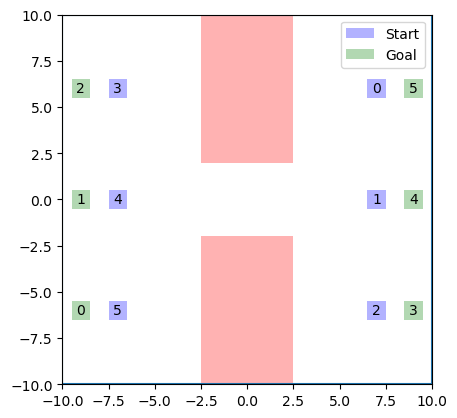

In [39]:
ax = plt.gca()
draw_env(env,show_agent_ID=True)
plt.show()    

In [40]:
from panav.SAMP import Tube_Planning
from panav.util import unique_tx
agents = set(np.arange(len(env.starts)))

plan = []
times = []
t0 = time()
success = True
fail_time = None
for agent in agents:
    print(agent)
    
    start = env.starts[agent]
    goal = env.goals[agent]

    agent_success = False
    
    for K in [7]:
        # print("K",K)
        results = Tube_Planning(env,start,goal,HG.vmax,bloating_r,\
                                    plan,\
                                    HG.d,K,ignore_finished_agents=False)
        if results is not None:
            t,xs = results
            times.append(time()-t0)
            # print(times)
            t,xs = unique_tx(t,xs)
            plan.append((t,xs))
            agent_success = True
            break
        

    if not agent_success:
        print("Solution failed.")
        success = False
        times.append(time()-t0)
        break



0
K 7
[0.022418975830078125]
1
K 7
[0.022418975830078125, 0.2836461067199707]
2
K 7
[0.022418975830078125, 0.2836461067199707, 0.6628780364990234]
3
K 7
[0.022418975830078125, 0.2836461067199707, 0.6628780364990234, 1.0035347938537598]
4
K 7
[0.022418975830078125, 0.2836461067199707, 0.6628780364990234, 1.0035347938537598, 5.38336181640625]
5
K 7
[0.022418975830078125, 0.2836461067199707, 0.6628780364990234, 1.0035347938537598, 5.38336181640625, 10.490595817565918]
